### TISE: Time Independent Schrodinger Equation 1D
$$
-\frac{\hbar ^ 2 }{2m}\frac{d^2 \psi}{dx^2} + V(x)\psi(x) = E\psi(x)
$$
Dimensionless
$$
-\frac{1}{2}\frac{d^2 \psi}{dx'^2} + V'(x)\psi(x) = E'\psi(x)
$$

#### Finite difference:
$$
f'' = \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{\Delta x^2}
$$
Apply finite difference in TISE, $\hbar = 1$:
$$
\psi_{n-1} = -\psi(x_{n-2}) + [2 + 2m\Delta x^2V(x_{n-1})]\psi(x_{n-1}) - \psi(x_n) -2m\Delta x^2 \psi(x_{n-1})
$$
Changing into eigenvalue problem in Matrix form (dimensionless);
$$
M = \begin{bmatrix}
2 & -1 & 0 & 0 & 0\\
-1 & 2 & -1 & 0 & 0\\
0 & -1 & 2 & -1 & 0\\
0 & 0 & -1 & 2 & -1\\
0 & 0 & 0 & -1 & 2\\
\end{bmatrix}
\begin{bmatrix}
\psi(x_1) &\\
\psi(x_2) &\\
\psi(x_3) &\\
\psi(x_4) &\\
\psi(x_5) &\\
\end{bmatrix}
= 2E\begin{bmatrix}
\psi(x_1) &\\
\psi(x_2) &\\
\psi(x_3) &\\
\psi(x_4) &\\
\psi(x_5) &\\
\end{bmatrix}
$$

TISE
$$
-\frac{1}{2}\frac{d^2 \psi}{dx'^2} + V'(x)\psi(x) = E'\psi(x)
$$
TDSE
$$
i\frac{\partial \psi}{\partial t'} = -\frac{1}{2}\frac{\partial^2 \psi}{\partial x'^2 } + V'(x)\psi
$$

In [7]:
# requirements and imports

import numpy as np
import matplotlib.pyplot as plt 
from scipy import sparse
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs

In [8]:
def check_tise(psi,V,E):
    dydx = np.gradient(psi,2)
    return np.array([((-1/2) * dydx  +  V*psi )- E*psi < 0.01])



[0.00094855 0.00094855 0.00379325 0.00379325 0.00853117]
[True, True, True, True, True]


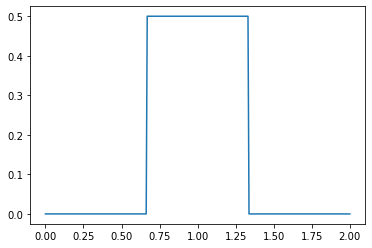

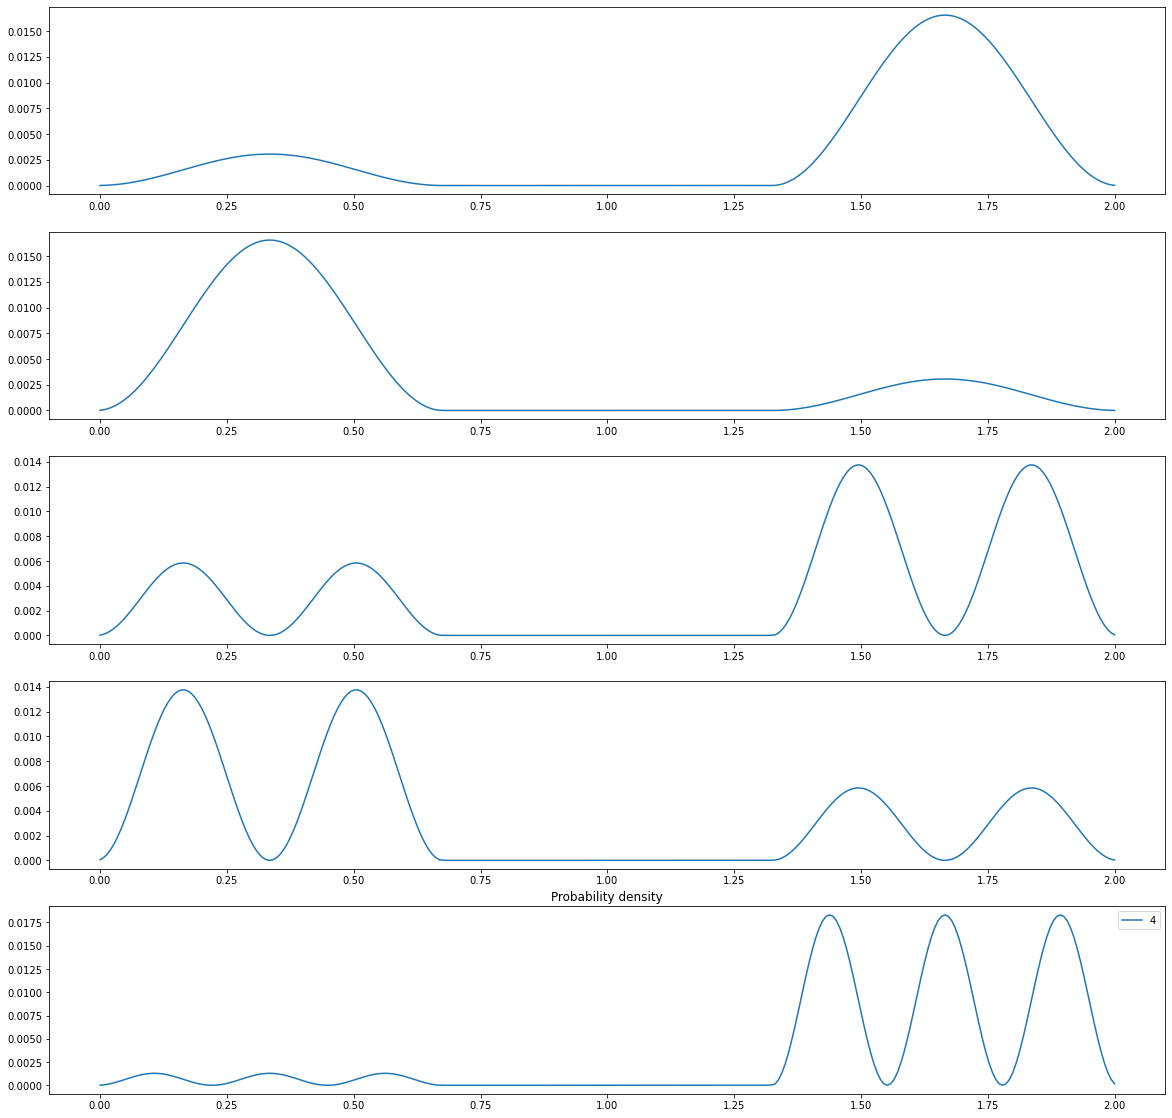

In [9]:
# 1D TISE

# system parameters
L = 2
N = 300
dx = L/(N)

mu,sig = 1.0 , 1/4

# x axis
x = np.linspace(0,2,N)


# potential 
def potential(x,mu,sig):
    return 100*-np.exp(-((x-mu)**2 )/ (2*sig**2))
# def potential(x,mu,sig):
    # return 10 * (x - 1)**2

# def potential(x, mu, sig):
    # return x * 0

def potential(x,mu,sig):
    a = np.ones(N) * 0.5
    a[:100] = 0
    a[200:] = 0
    return a

# matrix 
dia = np.ones([N])
diaa = np.array([dia * -1 , 2 * dia, dia * -1])
dia_potential = sparse.diags(potential(x,mu,sig))
M = sparse.spdiags(diaa, np.array([-1,0,1]),N,N) + dia_potential
# print(M.toarray())
e_values , e_vectors = eigsh(M, which = 'SA', k = 5)
print(e_values)
plt.plot(x,potential(x,mu,sig))

# plt.plot(x,e_vectors.T[0]**2, label = "0")
# plt.plot(x,e_vectors.T[0])

# plt.plot(x,e_vectors.T[1]**2, label = "1")
# plt.plot(x,e_vectors.T[1])

# plt.plot(x,e_vectors.T[2]**2, label = "2")
# plt.plot(x,e_vectors.T[2])
a = []
for i in range(5):
    a = [check_tise(e_vectors.T[i],potential(x,mu,sig),e_values[i]).all()] + a

print(a)

fig, ax = plt.subplots(5,figsize = (20,20))
for n in range(5):
    ax[n].plot(x,e_vectors.T[n]**2,label = n)
    # plt.plot(x,e_vectors.T[n]**2, label = n)
plt.title(label = "Probability density")
plt.legend()
plt.show()